In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_dir='C:\\Users\\visha\\TEA\\teasickness'

In [3]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [4]:
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224, 224, 3),
    include_top=False)

for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.summary()



19993432/19993432 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)   

 reduction_add_1_stem_1 (Ad  (None, 56, 56, 11)           0         ['separable_conv_2_bn_reductio
 d)                                                                 n_left1_stem_1[0][0]',        
                                                                     'separable_conv_2_bn_reductio
                                                                    n_right1_stem_1[0][0]']       
                                                                                                  
 separable_conv_1_reduction  (None, 56, 56, 11)           1920      ['separable_conv_1_pad_reducti
 _right2_stem_1 (SeparableC                                         on_right2_stem_1[0][0]']      
 onv2D)                                                                                           
                                                                                                  
 separable_conv_1_pad_reduc  (None, 115, 115, 32)         0         ['activation_7[0][0]']        
 tion_righ

 eragePooling2D)                                                    ']                            
                                                                                                  
 separable_conv_2_bn_reduct  (None, 56, 56, 11)           44        ['separable_conv_2_reduction_l
 ion_left4_stem_1 (BatchNor                                         eft4_stem_1[0][0]']           
 malization)                                                                                      
                                                                                                  
 reduction_right5_stem_1 (M  (None, 56, 56, 11)           0         ['reduction_pad_1_stem_1[0][0]
 axPooling2D)                                                       ']                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 112, 112, 32)         0         ['adjust_relu_1_stem_2[0][0]']
 g2D)     

                                                                                                  
 separable_conv_1_bn_reduct  (None, 28, 28, 22)           88        ['separable_conv_1_reduction_l
 ion_left1_stem_2 (BatchNor                                         eft1_stem_2[0][0]']           
 malization)                                                                                      
                                                                                                  
 separable_conv_1_bn_reduct  (None, 28, 28, 22)           88        ['separable_conv_1_reduction_r
 ion_right1_stem_2 (BatchNo                                         ight1_stem_2[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 activation_13 (Activation)  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
          

 onv2D)                                                                                           
                                                                                                  
 activation_19 (Activation)  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
                                                                    n_right3_stem_2[0][0]']       
                                                                                                  
 activation_21 (Activation)  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
                                                                    n_left4_stem_2[0][0]']        
                                                                                                  
 reduction_left2_stem_2 (Ma  (None, 28, 28, 22)           0         ['reduction_pad_1_stem_2[0][0]
 xPooling2D)                                                        ']                            
          

 adjust_conv_2_0 (Conv2D)    (None, 28, 28, 22)           968       ['adjust_avg_pool_2_0[0][0]'] 
                                                                                                  
 activation_22 (Activation)  (None, 28, 28, 88)           0         ['reduction_concat_stem_2[0][0
                                                                    ]']                           
                                                                                                  
 concatenate_1 (Concatenate  (None, 28, 28, 44)           0         ['adjust_conv_1_0[0][0]',     
 )                                                                   'adjust_conv_2_0[0][0]']     
                                                                                                  
 normal_conv_1_0 (Conv2D)    (None, 28, 28, 44)           3872      ['activation_22[0][0]']       
                                                                                                  
 adjust_bn

 ft2_0 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_normal_ri  (None, 28, 28, 44)           2332      ['activation_30[0][0]']       
 ght2_0 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_2_normal_le  (None, 28, 28, 44)           2332      ['activation_32[0][0]']       
 ft5_0 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_left
 _left1_0 (BatchNormalizati                                         1_0[0][0]']                   
 on)      

                                                                                                  
 activation_39 (Activation)  (None, 28, 28, 44)           0         ['adjust_bn_1[0][0]']         
                                                                                                  
 activation_41 (Activation)  (None, 28, 28, 44)           0         ['adjust_bn_1[0][0]']         
                                                                                                  
 activation_43 (Activation)  (None, 28, 28, 44)           0         ['normal_bn_1_1[0][0]']       
                                                                                                  
 separable_conv_1_normal_le  (None, 28, 28, 44)           3036      ['activation_35[0][0]']       
 ft1_1 (SeparableConv2D)                                                                          
                                                                                                  
 separable

                                                                                                  
 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_righ
 _right2_1 (BatchNormalizat                                         t2_1[0][0]']                  
 ion)                                                                                             
                                                                                                  
 normal_left3_1 (AveragePoo  (None, 28, 28, 44)           0         ['normal_bn_1_1[0][0]']       
 ling2D)                                                                                          
                                                                                                  
 normal_left4_1 (AveragePoo  (None, 28, 28, 44)           0         ['adjust_bn_1[0][0]']         
 ling2D)                                                                                          
          

 ft5_2 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_1_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_1_normal_left
 _left1_2 (BatchNormalizati                                         1_2[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_1_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_1_normal_righ
 _right1_2 (BatchNormalizat                                         t1_2[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable

                                                                     'separable_conv_2_bn_normal_r
                                                                    ight1_2[0][0]']               
                                                                                                  
 normal_add_2_2 (Add)        (None, 28, 28, 44)           0         ['separable_conv_2_bn_normal_l
                                                                    eft2_2[0][0]',                
                                                                     'separable_conv_2_bn_normal_r
                                                                    ight2_2[0][0]']               
                                                                                                  
 normal_add_3_2 (Add)        (None, 28, 28, 44)           0         ['normal_left3_2[0][0]',      
                                                                     'adjust_bn_2[0][0]']         
          

 on)                                                                                              
                                                                                                  
 activation_60 (Activation)  (None, 28, 28, 44)           0         ['separable_conv_1_bn_normal_l
                                                                    eft1_3[0][0]']                
                                                                                                  
 activation_62 (Activation)  (None, 28, 28, 44)           0         ['separable_conv_1_bn_normal_r
                                                                    ight1_3[0][0]']               
                                                                                                  
 activation_64 (Activation)  (None, 28, 28, 44)           0         ['separable_conv_1_bn_normal_l
                                                                    eft2_3[0][0]']                
          

                                                                     'normal_add_2_3[0][0]',      
                                                                     'normal_add_3_3[0][0]',      
                                                                     'normal_add_4_3[0][0]',      
                                                                     'normal_add_5_3[0][0]']      
                                                                                                  
 activation_70 (Activation)  (None, 28, 28, 264)          0         ['normal_concat_3[0][0]']     
                                                                                                  
 activation_69 (Activation)  (None, 28, 28, 264)          0         ['normal_concat_2[0][0]']     
                                                                                                  
 reduction_conv_1_reduce_4   (None, 28, 28, 88)           23232     ['activation_70[0][0]']       
 (Conv2D) 

                                                                    n_right1_reduce_4[0][0]']     
                                                                                                  
 separable_conv_1_reduction  (None, 14, 14, 88)           12056     ['separable_conv_1_pad_reducti
 _right2_reduce_4 (Separabl                                         on_right2_reduce_4[0][0]']    
 eConv2D)                                                                                         
                                                                                                  
 separable_conv_1_pad_reduc  (None, 31, 31, 88)           0         ['activation_77[0][0]']       
 tion_right3_reduce_4 (Zero                                                                       
 Padding2D)                                                                                       
                                                                                                  
 activatio

 ion_left4_reduce_4 (BatchN                                         eft4_reduce_4[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 reduction_right5_reduce_4   (None, 14, 14, 88)           0         ['reduction_pad_1_reduce_4[0][
 (MaxPooling2D)                                                     0]']                          
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 29, 29, 264)          0         ['adjust_relu_1_5[0][0]']     
 ing2D)                                                                                           
                                                                                                  
 reduction_add3_reduce_4 (A  (None, 14, 14, 88)           0         ['reduction_left3_reduce_4[0][
 dd)      

 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_left
 _left1_5 (BatchNormalizati                                         1_5[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_righ
 _right1_5 (BatchNormalizat                                         t1_5[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_left
 _left2_5 (BatchNormalizati                                         2_5[0][0]']                   
 on)      

                                                                                                  
 normal_add_2_5 (Add)        (None, 14, 14, 88)           0         ['separable_conv_2_bn_normal_l
                                                                    eft2_5[0][0]',                
                                                                     'separable_conv_2_bn_normal_r
                                                                    ight2_5[0][0]']               
                                                                                                  
 normal_add_3_5 (Add)        (None, 14, 14, 88)           0         ['normal_left3_5[0][0]',      
                                                                     'adjust_bn_5[0][0]']         
                                                                                                  
 normal_add_4_5 (Add)        (None, 14, 14, 88)           0         ['normal_left4_5[0][0]',      
          

 _left5_6 (BatchNormalizati                                         5_6[0][0]']                   
 on)                                                                                              
                                                                                                  
 activation_95 (Activation)  (None, 14, 14, 88)           0         ['separable_conv_1_bn_normal_l
                                                                    eft1_6[0][0]']                
                                                                                                  
 activation_97 (Activation)  (None, 14, 14, 88)           0         ['separable_conv_1_bn_normal_r
                                                                    ight1_6[0][0]']               
                                                                                                  
 activation_99 (Activation)  (None, 14, 14, 88)           0         ['separable_conv_1_bn_normal_l
          

 te)                                                                 'normal_add_1_6[0][0]',      
                                                                     'normal_add_2_6[0][0]',      
                                                                     'normal_add_3_6[0][0]',      
                                                                     'normal_add_4_6[0][0]',      
                                                                     'normal_add_5_6[0][0]']      
                                                                                                  
 activation_104 (Activation  (None, 14, 14, 528)          0         ['normal_concat_5[0][0]']     
 )                                                                                                
                                                                                                  
 activation_105 (Activation  (None, 14, 14, 528)          0         ['normal_concat_6[0][0]']     
 )        

 )                                                                  ight2_7[0][0]']               
                                                                                                  
 activation_115 (Activation  (None, 14, 14, 88)           0         ['separable_conv_1_bn_normal_l
 )                                                                  eft5_7[0][0]']                
                                                                                                  
 separable_conv_2_normal_le  (None, 14, 14, 88)           9944      ['activation_107[0][0]']      
 ft1_7 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_normal_ri  (None, 14, 14, 88)           8536      ['activation_109[0][0]']      
 ght1_7 (SeparableConv2D)                                                                         
          

 Conv2D)                                                                                          
                                                                                                  
 normal_conv_1_8 (Conv2D)    (None, 14, 14, 88)           46464     ['activation_117[0][0]']      
                                                                                                  
 adjust_bn_8 (BatchNormaliz  (None, 14, 14, 88)           352       ['adjust_conv_projection_8[0][
 ation)                                                             0]']                          
                                                                                                  
 normal_bn_1_8 (BatchNormal  (None, 14, 14, 88)           352       ['normal_conv_1_8[0][0]']     
 ization)                                                                                         
                                                                                                  
 activatio

                                                                                                  
 separable_conv_2_normal_ri  (None, 14, 14, 88)           8536      ['activation_125[0][0]']      
 ght2_8 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_2_normal_le  (None, 14, 14, 88)           8536      ['activation_127[0][0]']      
 ft5_8 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_2_normal_left
 _left1_8 (BatchNormalizati                                         1_8[0][0]']                   
 on)                                                                                              
          

                                                                                                  
 activation_132 (Activation  (None, 14, 14, 176)          0         ['adjust_bn_reduce_8[0][0]']  
 )                                                                                                
                                                                                                  
 separable_conv_1_pad_reduc  (None, 17, 17, 176)          0         ['activation_130[0][0]']      
 tion_left1_reduce_8 (ZeroP                                                                       
 adding2D)                                                                                        
                                                                                                  
 separable_conv_1_pad_reduc  (None, 19, 19, 176)          0         ['activation_132[0][0]']      
 tion_right1_reduce_8 (Zero                                                                       
 Padding2D

                                                                                                  
 separable_conv_1_reduction  (None, 7, 7, 176)            32560     ['activation_138[0][0]']      
 _left4_reduce_8 (Separable                                                                       
 Conv2D)                                                                                          
                                                                                                  
 activation_135 (Activation  (None, 7, 7, 176)            0         ['separable_conv_1_bn_reductio
 )                                                                  n_right2_reduce_8[0][0]']     
                                                                                                  
 separable_conv_1_bn_reduct  (None, 7, 7, 176)            704       ['separable_conv_1_reduction_r
 ion_right3_reduce_8 (Batch                                         ight3_reduce_8[0][0]']        
 Normaliza

 dd)                                                                n_left4_reduce_8[0][0]',      
                                                                     'reduction_right5_reduce_8[0]
                                                                    [0]']                         
                                                                                                  
 cropping2d_3 (Cropping2D)   (None, 14, 14, 528)          0         ['zero_padding2d_3[0][0]']    
                                                                                                  
 reduction_concat_reduce_8   (None, 7, 7, 704)            0         ['reduction_add_2_reduce_8[0][
 (Concatenate)                                                      0]',                          
                                                                     'reduction_add3_reduce_8[0][0
                                                                    ]',                           
          

                                                                                                  
 separable_conv_1_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_1_normal_left
 _left5_9 (BatchNormalizati                                         5_9[0][0]']                   
 on)                                                                                              
                                                                                                  
 activation_142 (Activation  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_l
 )                                                                  eft1_9[0][0]']                
                                                                                                  
 activation_144 (Activation  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_r
 )                                                                  ight1_9[0][0]']               
          

                                                                                                  
 normal_concat_9 (Concatena  (None, 7, 7, 1056)           0         ['adjust_bn_9[0][0]',         
 te)                                                                 'normal_add_1_9[0][0]',      
                                                                     'normal_add_2_9[0][0]',      
                                                                     'normal_add_3_9[0][0]',      
                                                                     'normal_add_4_9[0][0]',      
                                                                     'normal_add_5_9[0][0]']      
                                                                                                  
 activation_151 (Activation  (None, 7, 7, 704)            0         ['reduction_concat_reduce_8[0]
 )                                                                  [0]']                         
          

                                                                                                  
 activation_160 (Activation  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_r
 )                                                                  ight2_10[0][0]']              
                                                                                                  
 activation_162 (Activation  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_l
 )                                                                  eft5_10[0][0]']               
                                                                                                  
 separable_conv_2_normal_le  (None, 7, 7, 176)            35376     ['activation_154[0][0]']      
 ft1_10 (SeparableConv2D)                                                                         
                                                                                                  
 separable

                                                                                                  
 adjust_conv_projection_11   (None, 7, 7, 176)            185856    ['activation_163[0][0]']      
 (Conv2D)                                                                                         
                                                                                                  
 normal_conv_1_11 (Conv2D)   (None, 7, 7, 176)            185856    ['activation_164[0][0]']      
                                                                                                  
 adjust_bn_11 (BatchNormali  (None, 7, 7, 176)            704       ['adjust_conv_projection_11[0]
 zation)                                                            [0]']                         
                                                                                                  
 normal_bn_1_11 (BatchNorma  (None, 7, 7, 176)            704       ['normal_conv_1_11[0][0]']    
 lization)

 separable_conv_2_normal_le  (None, 7, 7, 176)            35376     ['activation_170[0][0]']      
 ft2_11 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_2_normal_ri  (None, 7, 7, 176)            32560     ['activation_172[0][0]']      
 ght2_11 (SeparableConv2D)                                                                        
                                                                                                  
 separable_conv_2_normal_le  (None, 7, 7, 176)            32560     ['activation_174[0][0]']      
 ft5_11 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_left
 _left1_11

 )                                                                                                
                                                                                                  
 activation_179 (Activation  (None, 7, 7, 176)            0         ['adjust_bn_12[0][0]']        
 )                                                                                                
                                                                                                  
 activation_181 (Activation  (None, 7, 7, 176)            0         ['adjust_bn_12[0][0]']        
 )                                                                                                
                                                                                                  
 activation_183 (Activation  (None, 7, 7, 176)            0         ['adjust_bn_12[0][0]']        
 )                                                                                                
          

 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_righ
 _right1_12 (BatchNormaliza                                         t1_12[0][0]']                 
 tion)                                                                                            
                                                                                                  
 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_left
 _left2_12 (BatchNormalizat                                         2_12[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_righ
 _right2_12 (BatchNormaliza                                         t2_12[0][0]']                 
 tion)    

In [6]:
batch_size=32

In [16]:
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224, 224, 3),
    include_top=False)

for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_data,
    steps_per_epoch=train_data.n// batch_size,
    epochs=50,
    validation_steps=val_data.n// batch_size,
    validation_data=val_data)


Epoch 1/50
22/22 [==============================] - 327s 13s/step - loss: 1.7629 - accuracy: 0.3520 - val_loss: 1.3641 - val_accuracy: 0.4938
Epoch 2/50
22/22 [==============================] - 240s 11s/step - loss: 1.2322 - accuracy: 0.5479 - val_loss: 1.1860 - val_accuracy: 0.5625
Epoch 3/50
22/22 [==============================] - 252s 12s/step - loss: 0.9897 - accuracy: 0.6378 - val_loss: 0.9803 - val_accuracy: 0.6187
Epoch 4/50
22/22 [==============================] - 250s 11s/step - loss: 0.8702 - accuracy: 0.6539 - val_loss: 0.8864 - val_accuracy: 0.6750
Epoch 5/50
22/22 [==============================] - 250s 11s/step - loss: 0.8043 - accuracy: 0.7084 - val_loss: 0.9585 - val_accuracy: 0.6562
Epoch 6/50
22/22 [==============================] - 242s 11s/step - loss: 0.8181 - accuracy: 0.7010 - val_loss: 0.8096 - val_accuracy: 0.6938
Epoch 7/50
22/22 [==============================] - 253s 12s/step - loss: 0.7197 - accuracy: 0.7320 - val_loss: 0.9323 - val_accuracy: 0.6625
Epoch 

In [27]:

loss, accuracy = model.evaluate(val_data)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

6/6 [==============================] - 19s 3s/step - loss: 0.8078 - accuracy: 0.6954
Validation Loss: 0.8078
Validation Accuracy: 0.6954


In [28]:
import matplotlib.pyplot as plt

def plot_loss(history):
   
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
   
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



In [29]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [30]:

loss, accuracy = model.evaluate(test_data)


print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 43s 2s/step - loss: 0.5200 - accuracy: 0.7936
Test Loss: 0.5200219750404358
Test Accuracy: 0.7935606241226196


In [31]:

true_labels = test_data.classes


predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

17/17 [==============================] - 69s 4s/step


In [32]:

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.08      0.05      0.06        60
           1       0.12      0.12      0.12        67
           2       0.09      0.12      0.10        60
           3       0.08      0.06      0.07        67
           4       0.09      0.10      0.09        60
           5       0.07      0.07      0.07        44
           6       0.17      0.18      0.17        85
           7       0.14      0.15      0.14        85

    accuracy                           0.11       528
   macro avg       0.10      0.11      0.10       528
weighted avg       0.11      0.11      0.11       528



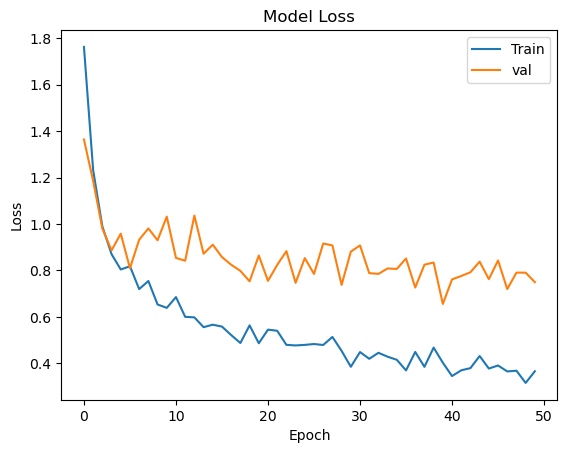

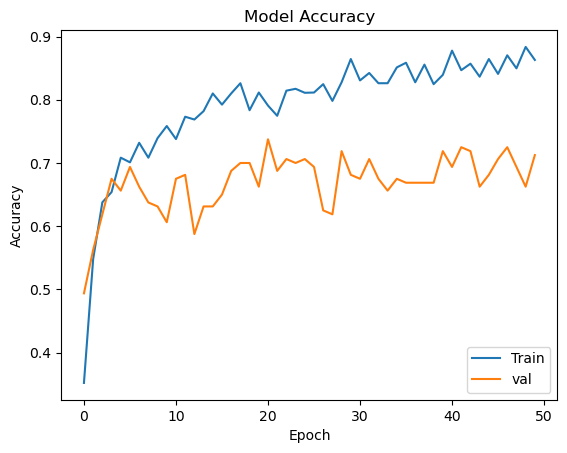

In [33]:
plot_loss(history)
plot_accuracy(history)

In [34]:

true_labels = test_data.classes

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 167s 10s/step


In [35]:

print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.11      0.07      0.08        60
           1       0.12      0.12      0.12        67
           2       0.13      0.17      0.15        60
           3       0.17      0.13      0.15        67
           4       0.12      0.15      0.14        60
           5       0.09      0.09      0.09        44
           6       0.20      0.20      0.20        85
           7       0.14      0.15      0.15        85

    accuracy                           0.14       528
   macro avg       0.14      0.14      0.13       528
weighted avg       0.14      0.14      0.14       528



In [36]:

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4  7  6  6 12  7  9  9]
 [ 3  8 10  6 11  6 12 11]
 [ 3  9 10  5 11  3  9 10]
 [ 4  9 10  9  8  5  9 13]
 [ 8  5  6  7  9  5  7 13]
 [ 1  6  7  3  4  4 10  9]
 [ 9 12 13 10  8  3 17 13]
 [ 6 13 15  8  9 10 11 13]]


In [37]:

true_labels = test_data.classes


In [38]:

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

17/17 [==============================] - 166s 10s/step


In [39]:

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.11      0.12      0.12        67
           2       0.06      0.08      0.07        60
           3       0.10      0.07      0.09        67
           4       0.10      0.12      0.11        60
           5       0.11      0.09      0.10        44
           6       0.12      0.13      0.12        85
           7       0.18      0.19      0.18        85

    accuracy                           0.11       528
   macro avg       0.10      0.10      0.10       528
weighted avg       0.10      0.11      0.10       528



In [40]:

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  5 11  8 14  2  9 11]
 [ 4  8 11  7  7  4 14 12]
 [ 4  9  5  4 10  3 13 12]
 [10 12 10  5  4  5 13  8]
 [ 9  4 11  7  7  5 11  6]
 [ 3  9  6  2  6  4  6  8]
 [ 6 14 13  4 10  9 11 18]
 [ 5 10 14 11 10  5 14 16]]


In [41]:
import matplotlib.pyplot as plt



In [42]:

num_images = 5
test_images, test_labels = next(test_data)



In [43]:

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



1/1 [==============================] - 1s 520ms/step


In [44]:

class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]



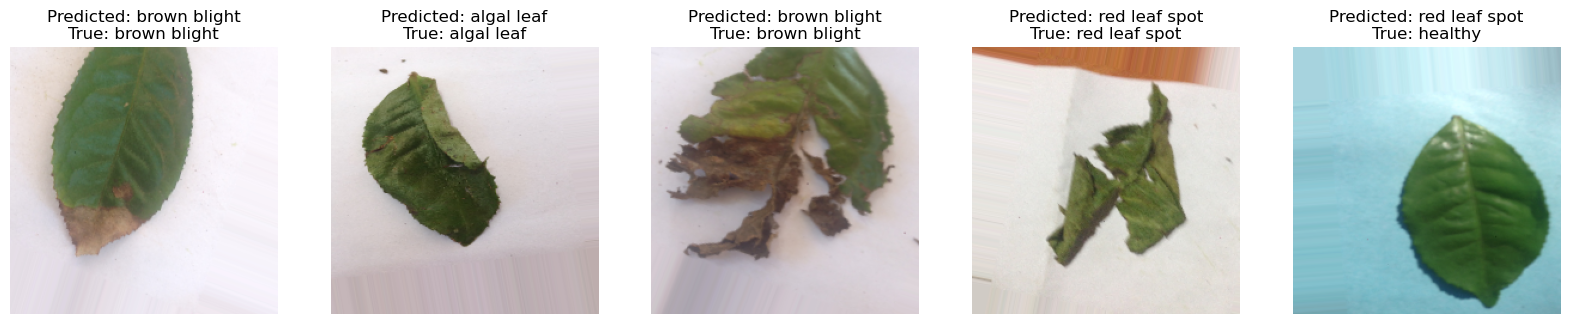

In [45]:

fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [46]:
model.save("C:\\Users\\visha")

INFO:tensorflow:Assets written to: C:\Users\visha\assets


INFO:tensorflow:Assets written to: C:\Users\visha\assets
